In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **1 - Loading Dataset**

In [3]:
df = tf.keras.datasets.cifar100.load_data(label_mode="fine")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
(X_train, y_train), (X_test, y_test) = df

In [5]:
print(f"The dataset includes {len(X_train)} train samples and {len(X_test)} test samples.\n")
print("Train data sample shape: ", X_train.shape)
print("Test data sample shape: ", X_test.shape)

The dataset includes 50000 train samples and 10000 test samples.

Train data sample shape:  (50000, 32, 32, 3)
Test data sample shape:  (10000, 32, 32, 3)


In [5]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed',
    'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
    'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle',
    'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
    'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
    'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum',
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar',
    'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',
    'wolf', 'woman', 'worm'
]


In [6]:
print(len(class_names))

100


In [7]:
class_label_index = [i for i in range(100)]

In [13]:
print(class_label_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [8]:
class_labels = {index: class_name for index, class_name in zip(class_label_index, class_names)}

In [10]:
print(class_labels)

{0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly', 15: 'camel', 16: 'can', 17: 'castle', 18: 'caterpillar', 19: 'cattle', 20: 'chair', 21: 'chimpanzee', 22: 'clock', 23: 'cloud', 24: 'cockroach', 25: 'couch', 26: 'crab', 27: 'crocodile', 28: 'cup', 29: 'dinosaur', 30: 'dolphin', 31: 'elephant', 32: 'flatfish', 33: 'forest', 34: 'fox', 35: 'girl', 36: 'hamster', 37: 'house', 38: 'kangaroo', 39: 'keyboard', 40: 'lamp', 41: 'lawn_mower', 42: 'leopard', 43: 'lion', 44: 'lizard', 45: 'lobster', 46: 'man', 47: 'maple_tree', 48: 'motorcycle', 49: 'mountain', 50: 'mouse', 51: 'mushroom', 52: 'oak_tree', 53: 'orange', 54: 'orchid', 55: 'otter', 56: 'palm_tree', 57: 'pear', 58: 'pickup_truck', 59: 'pine_tree', 60: 'plain', 61: 'plate', 62: 'poppy', 63: 'porcupine', 64: 'possum', 65: 'rabbit', 66: 'raccoon', 67: 'ray', 68: 'road', 69: 'rocket', 70: 'rose', 

# **2 - Data Vizualization**

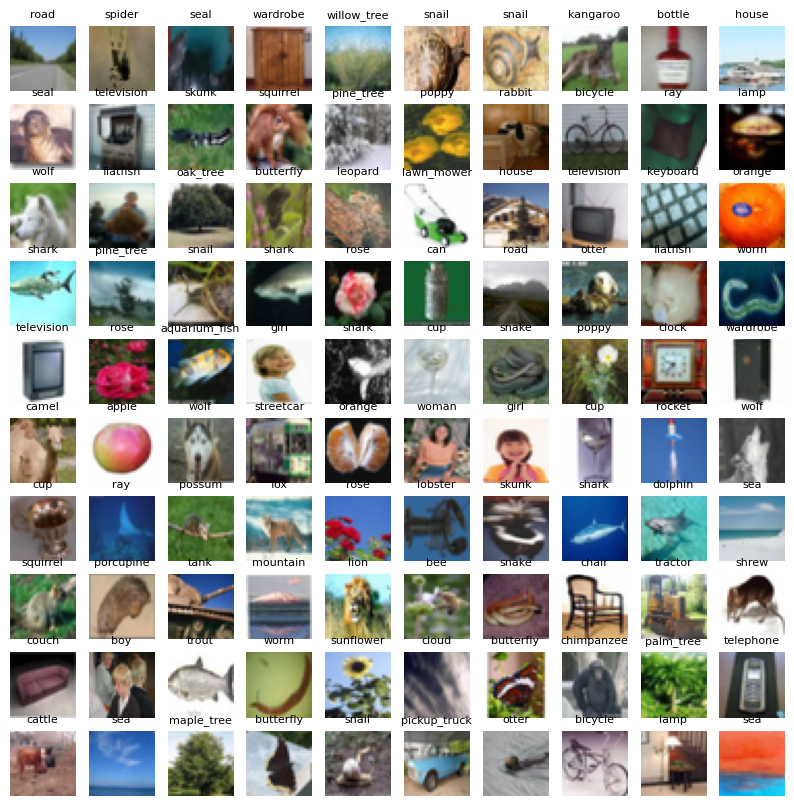

In [9]:
# Selecting a random set of 9 images
random_index = np.random.randint(len(X_train) - 100)

def plot_images():
  # Defining the plotting features
  fig, axes = plt.subplots(10, 10, figsize=(10, 10))

  # Plotting each sample
  for image in range(100):
    plt.subplot(10, 10, image + 1)
    plt.imshow(X_train[random_index + image])
    plt.title(class_labels[y_train[random_index + image][0]], fontsize=8)
    plt.axis("off")

  # Displaying results
  plt.show()

plot_images()

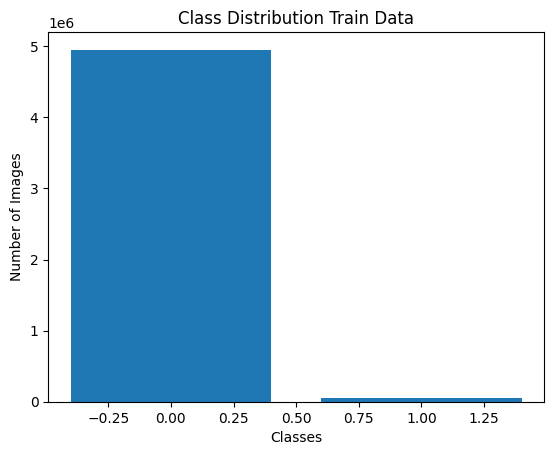

In [11]:
# Klassenverteilung
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution Train Data')
plt.show()

# **3 - Data Preparation/Reduction**

Before we load the data into a ```Model``` and ```Neural Network```, it is recommended to implement some data reduction techniques to ensure maximum **efficiency**

# 3.1 - Samples Reduction

3.1.1 - Current Samples Values

Each pixel in each image stores colour intensity values in the range of ```0-255``` which is the representation of 256 bits in total, where:
- ```0``` represents the minimum colour intencity.
- ```255``` represents the maximum colour intencity.

So, let's quickly print out an example of some pixel values from our train sample.

In [16]:
# Printing out pixel values of fifth image from our train data
# [first sample], [first colour channel], [first row of pixels]
print("Pixel values of first image:", X_train[4][0][0])

Pixel values of first image: [43 49 46]


3.1.2 - Sample Normalization

The problem is that the values **we** just printed span across a very large range!
So, in fact, we have to reduce it by mapping each value in the range of ```0-255``` to an equivalent value in the range of ```0-1```.
This technique is called **Normalization** where relationship between the values remains the same, but they are reduced to a smaller scale (Like imagine the computers are reading/working with 0 and 1s).
We'll simply divide each pixel value in our samples by 255, like down below:

In [9]:
# Normalizing data dividing each pixel by 255
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

3.1.3 - Updated Sample Values

When we print out the exact same example as before, we will get the same values but at a different scale which is like 4x smaller.
We can actually verify that our images did not change their appearance, by **re-running the plotting cell** from above. You will see that our reduction technique did not result in any loss of information.

In [19]:
# Printing out new scaled sample information after Normalization
print("Pixel values of first image:", X_train[4][0][0])

Pixel values of first image: [0.16862746 0.19215687 0.18039216]


# 3.2 Labels Reduction

3.2.1 - Current Label Values

Currently, our labels are storing integer values which represents a certain class.

In [25]:
# Printing out the class label of the fifth image of the train sample
label_example = "Class {} represents a {}.".format(y_train[4][0], class_names[y_train[4][0]])
print(label_example)

Class 1 represents a aquarium_fish.


3.2.2 - One Hot Encoding

The problem her again is - Once again we are dealing with a **relatively large search space** of values in the range of 0-9.
However, we cannot normalize these values like the image samples because they represent distinct categories (in other words - they are discrete (constant) and therefore we cannot treat them like continous values). In these cases we use a different technique called **One-Hot Encoding**. We convert decimal values to their binary representation. Such like this:

  - The class of ```0``` is One-Hot Encoded into ```1000000000...```
  - The class of ```1``` is One-Hot Encoded into ```0100000000...```
  - The class of ```2``` is One-Hot Encoded into ```0010000000...```
  - The class of ```9``` is One-Hot Encoded into ```0000000001...```

  and so on.

Let's quickly implement this in the next cell.

In [10]:
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

3.2.3 - Updated Label Values

When we print the exact same label as before, we will get the same values but they are represented differently because we converted them to binary values using the One-Hot Encoding technique.

In [28]:
OHE_label_example = "Class {} represents a {}.".format(y_train[4], class_names[np.argmax(y_train[4])])
print(OHE_label_example)

Class [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] represents a aquarium_fish.


# 3.3 - Dimensionality Reduction

3.3.1 - Sample Flattening

To build our ```model``` we have to flatten our samples making it easier to train the model. By using the flattening technique the **3 dimesional** arrays of the images get reduced to a **single dimensional array**, what means the image gets converted to a long value of pixels which speeds up and makes it easier to process.

In [11]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

3.3.2 - Flattened Sample Values

In [32]:
print(f"The shape of the train data after flattening: {X_train_flat.shape}")

The shape of the train data after flattening: (50000, 3072)


In [33]:
print(f"The shape of the test data after flattening: {X_test_flat.shape}")

The shape of the test data after flattening: (10000, 3072)


In [34]:
print("The pixel values of the first imagea after flattening: ", X_train_flat[0])

The pixel values of the first imagea after flattening:  [1.         1.         1.         ... 0.5411765  0.6784314  0.30980393]


# **4 - Model Building and Training**

Now it's time for the **Model Building**. We will build a pipeline where we will use the ```Standarscaler``` to get the images which have the same labels and which are in the same category more percisely categorized, the ```RandomForestClassifier```, ```K-Nearest Neighbors``` and ```DecissionTrees``` algorithms to train the models for further predictions. Afterwards we will build a Convolutional Neural Network to let our model learn more about the pixel structures of the images by splitting them into more smaller pieces. During the ```Model Building``` and ```Model Training``` I highly encourage you to use your knowledge to change some of the parameters and find how they affect the result. Or simply play with the parameters by following the main rules for building and train a model. Maybe you will get a better result.

# 4.1 - RandomForestClassifier Pipeline Model

In [10]:
rfc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [11]:
rfc_pipeline.fit(X_train_flat, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [15]:
y_pred_rfc = rfc_pipeline.predict(X_test_flat)

4.1.1 - RFC Accuracy Score

In [16]:
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {rfc_accuracy}")

Random Forest Classifier Accuracy: 0.0147


4.1.2 - RFC F1 Score

In [33]:
rfc_f1 = f1_score(y_test, y_pred_rfc, average="macro")
print(f"Random Forest Classifier F1 Score: {rfc_f1}")

Random Forest Classifier F1 Score: 0.026019923601764486


4.1.3 - RFC Precision Score

In [34]:
rfc_precision = precision_score(y_test, y_pred_rfc, average="macro")
print(f"Random Forest Classifier Precision: {rfc_precision}")

Random Forest Classifier Precision: 0.23744444444444443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.1.4 - RFC Recall Score

In [35]:
rfc_recall = recall_score(y_test, y_pred_rfc, average="macro")
print(f"Random Forest Classifier Recall: {rfc_recall}")

Random Forest Classifier Recall: 0.014700000000000001


4.1.5 - RFC Mean Squared Error

In [36]:
rfc_mse = mean_squared_error(y_test, y_pred_rfc)
print(f"Random Forest Classifier Mean Squared Error: {rfc_mse}")

Random Forest Classifier Mean Squared Error: 0.009866999999999999


# 4.2 - K-Nearest Neighbors Classifier Pipeline Model

In [17]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=10))
])

In [18]:
knn_pipeline.fit(X_train_flat, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [19]:
y_pred_knn = knn_pipeline.predict(X_test_flat)

4.2.1 - KNN Accuracy Score

In [20]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy}")

K-Nearest Neighbors Classifier Accuracy: 0.045


4.2.2 - KNN F1 Score

In [37]:
knn_f1 = f1_score(y_test, y_pred_knn, average="macro")
print(f"K-Nearest Neighbors Classifier F1 Score: {knn_f1}")

K-Nearest Neighbors Classifier F1 Score: 0.06953319328318892


4.2.3 - KNN Precision Score

In [38]:
knn_precision = precision_score(y_test, y_pred_knn, average="macro")
print(f"K-Nearest Neighbors Classifier Precision: {knn_precision}")

K-Nearest Neighbors Classifier Precision: 0.36261265128570197


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4.2.4 - KNN Recall Score

In [39]:
knn_recall = recall_score(y_test, y_pred_knn, average="macro")
print(f"K-Nearest Neighbors Classifier Recall: {knn_recall}")

K-Nearest Neighbors Classifier Recall: 0.045


4.2.5 - KNN Mean Squred Error

In [40]:
knn_mse = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classifier Mean Squared Error: {knn_mse}")

K-Nearest Neighbors Classifier Mean Squared Error: 0.009845999999999999


# 4.3 - Decission Tree Classifier

In [27]:
dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

In [30]:
dt_pipeline.fit(X_train_flat, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [31]:
y_pred_dt = dt_pipeline.predict(X_test_flat)

4.3.1 - DecisionTree Accuracy Score

In [32]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")

Decision Tree Classifier Accuracy: 0.0856


4.3.2 - DecisionTree F1 Score

In [41]:
dt_f1 = f1_score(y_test, y_pred_dt, average="macro")
print(f"Decision Tree Classifier F1 Score: {dt_f1}")

Decision Tree Classifier F1 Score: 0.08587025762013646


4.3.3 - DecisionTree Precision Score

In [42]:
dt_precision = precision_score(y_test, y_pred_dt, average="macro")
print(f"Decision Tree Classifier Precision: {dt_precision}")

Decision Tree Classifier Precision: 0.08668373994125328


4.3.4 - DecisionTree Recall Score

In [43]:
dt_recall = recall_score(y_test, y_pred_dt, average="macro")
print(f"Decision Tree Classifier Recall: {dt_recall}")

Decision Tree Classifier Recall: 0.08559999999999998


4.3.5 - DecisionTree Mean Squared Error

In [44]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Classifier Mean Squared Error: {dt_mse}")

Decision Tree Classifier Mean Squared Error: 0.018286000000000004


# **5 - Building the Convolutional Neural Network**

Now it is time for building the Convolutional Neural Network.

# 5.1 - Exploration Rules

You can remove, add or change the layers and their parameters, as long as you follow the following rules:

- do not change the input shape, it must remain: ```input_shape=(32, 32, 3)```, because it is the dimensional information of our images we are working with.
- do not change the output units of the last Dense layer, it have remain: ```Dense(256)``` for **relu** activation and ```Dense(100)``` for **softmax** activation.
- do not remove the batch normalizer, it must be last: ```BatchNormalization()```
- do not remove the Flatten layer, it must remain in between the Convolutional/MaxPooling layers and the Dense ones: ```Flatten()```
- do not change the loss, it must remain: ```loss = 'categorical_crossentropy'```
- do not change the evaluation metrics, as they are associated with the lost, they must remain at: ```metrics = ['accuracy']```

# 5.2 - Building the Convolutional Neural Network

In [32]:
# Building the CNN

def build_cnn_model():
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax'),
    ])

    return cnn_model

In [33]:
model = build_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5.2.1 - Compiling the Model

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

5.2.2 - Model Summarization

In [35]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,172 (981.14 KB)

 Trainable params: 250,724 (979.39 KB)

 Non-trainable params: 448 (1.75 KB)

# **6 - Model Training**

Once the data and model are ready, we can proceed with training.
The process of repitition in this CNN, allows the model to recognize patterns within the data as it observes it from different angles through angles through different filters.

# 6.1 - Model Validation

Usually, by training such Neural Network models, it is highly recommended to perform a process called "Validation". This is used to compare the real data with the trained data which we fit into our model to ensure that the model has learned correctly from our data. However, it's beyond the scope of this project, Validation is a topic which needs to be dealt with seperately.

 - Train metric: ```history.history['accuracy']```
 - Train metric: ```history.history['loss']```
 - Validation metric: ```history.history['val_accuracy']```
 - Validation metric: ```history.history['val_loss']```

In [37]:
# Reserving samples for validation

valset_size = len(X_train) // 5
X_val = X_train[-valset_size:]
y_val = y_train[-valset_size:]
X_partial_train = X_train[:-valset_size]
y_partial_train = y_train[:-valset_size]


# Performing Validation on the Model
history = model.fit(
    X_partial_train,
    y_partial_train,
    epochs=2,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 168ms/step - accuracy: 0.0377 - loss: 4.4793 - val_accuracy: 0.1015 - val_loss: 3.9584
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.0973 - loss: 3.9481 - val_accuracy: 0.1703 - val_loss: 3.5053


# 6.2 - Training Rules

- **Epochs:** Each data sample passes through each model layer exactly ```number_of_epochs```times.
Where epoch represents one model iteration over the data, in our case - we have ```50```of them.
- **History:** The history object stores a dictionary that tracks the ```accuracy```and ```loss```metrics for each epoch.
- **Loss:** Loss must reduce over time, otherwise there is something wrong with your built model.
- **Accuracy:** Accuracy must improve over time, otherwise there is something wrong with your built model too.

# 6.3 - Performing Training

In [38]:
%%time

# Model Training
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val)
)

# Displaying Training and Validation Data

print("\nInitial Accuracy: {} | Latest Accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("Initial Loss: {} | Latest Loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.1329 - loss: 3.6922 - val_accuracy: 0.1536 - val_loss: 3.7014
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 154ms/step - accuracy: 0.1674 - loss: 3.4791 - val_accuracy: 0.2022 - val_loss: 3.2971
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 154ms/step - accuracy: 0.1985 - loss: 3.3204 - val_accuracy: 0.2871 - val_loss: 2.8416
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 164ms/step - accuracy: 0.2154 - loss: 3.1968 - val_accuracy: 0.3060 - val_loss: 2.7043
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.2389 - loss: 3.0714 - val_accuracy: 0.3205 - val_loss: 2.6974
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.2601 - loss: 2.9792 - val_accuracy: 0.3357 - val_loss: 2.6041
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 154ms/step - accuracy: 0.2690 - loss: 2.9185 - val_accuracy: 0.3469 - val_loss: 2.5730
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.2802 -

# 6.4 - Visualization of the Training Results

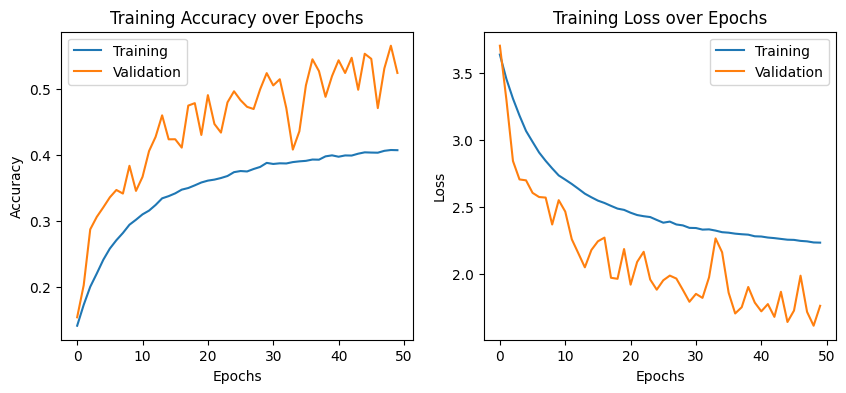

In [39]:
fig, axis = plt.subplots(1, 2, figsize=(10, 4))
axis[0].plot(history.history["accuracy"])
axis[0].set_title("Training Accuracy over Epochs")
axis[1].plot(history.history["loss"])
axis[1].set_title("Training Loss over Epochs")

# Here we put the code lines to plot the validation parameters.

axis[0].plot(history.history["val_accuracy"])
axis[1].plot(history.history["val_loss"])

# Putting label titles and legend to the graphs

# First graph

axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Accuracy")
axis[0].legend(["Training", "Validation"], loc="upper left")

# Second graph

axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Loss")
axis[1].legend(["Training", "Validation"], loc="upper right")

# Plotting all Results
plt.show()

# **7 - Model Testing**

# 7.1 - Performing Test

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy Score: ", test_accuracy)
print("\nTest Loss Score: ", test_loss)

313/313 - 5s - 15ms/step - accuracy: 0.4371 - loss: 2.1112

Test Accuracy Score:  0.43709999322891235

Test Loss Score:  2.1112489700317383


# 7.2 - Verifying Test Results by making some Predictions

7.2.2 - Fetching Predictions for each Sample

In [41]:
def make_predictions():
  predictions = model.predict(X_test)
  return predictions

predictions = make_predictions()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


7.2.3 - Plotting Predictions along with their Predictions

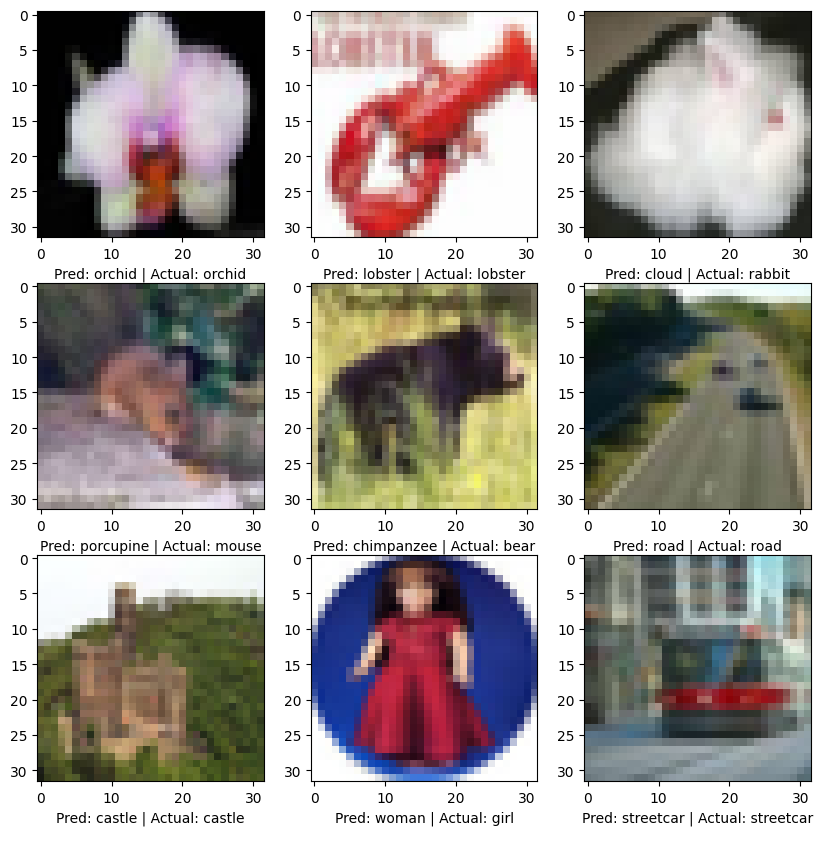

In [59]:
# Selecting a random set of 9 test images

index = np.random.randint(len(y_test) - 9)

# Plotting each test image along with its prediction

plt.figure(figsize=(10, 10))

for image in range(9):
  plt.subplot(3, 3, image + 1)
  plt.imshow(X_test[image + index])
  plt.xlabel("Pred: {} | Actual: {}\n"
            .format(class_names[np.argmax(predictions[image + index])], class_names[np.argmax(y_test[image + index])]))

# Displaying Results
plt.show()